In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import data
path1 = raw_data_path + "/Imaging/mng/210804_nwg378_tom4,5,60,500"
path2 = raw_data_path + "/Imaging/mng/220826_nwg378_tom4,5,60,500"
paths = direcslist(path1) + direcslist(path2)
print(len(paths))
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

17


In [3]:
# Run calibration
iq = ImageQuant2(img=imgs, roi=rois)
iq.calibrate_cytoplasm()

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<06:09,  1.62it/s]

  1%|█▊                                                                                                                                        | 8/600 [00:00<00:41, 14.35it/s]

  3%|███▉                                                                                                                                     | 17/600 [00:00<00:19, 30.24it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:11, 47.71it/s]

  6%|████████▉                                                                                                                                | 39/600 [00:01<00:09, 62.28it/s]

  8%|███████████▋                                                                                                                             | 51/600 [00:01<00:07, 76.43it/s]

 11%|██████████████▌                                                                                                                          | 64/600 [00:01<00:05, 89.85it/s]

 13%|█████████████████▌                                                                                                                       | 77/600 [00:01<00:05, 99.52it/s]

 15%|████████████████████▍                                                                                                                   | 90/600 [00:01<00:04, 106.32it/s]

 17%|██████████████████████▉                                                                                                                | 102/600 [00:01<00:04, 109.11it/s]

 19%|█████████████████████████▉                                                                                                             | 115/600 [00:01<00:04, 112.87it/s]

 21%|████████████████████████████▊                                                                                                          | 128/600 [00:01<00:04, 116.43it/s]

 24%|███████████████████████████████▉                                                                                                       | 142/600 [00:01<00:03, 120.54it/s]

 26%|██████████████████████████████████▉                                                                                                    | 155/600 [00:01<00:03, 118.11it/s]

 28%|█████████████████████████████████████▌                                                                                                 | 167/600 [00:02<00:04, 103.24it/s]

 30%|████████████████████████████████████████▎                                                                                               | 178/600 [00:02<00:04, 94.93it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:04, 94.24it/s]

 33%|████████████████████████████████████████████▉                                                                                           | 198/600 [00:02<00:04, 88.75it/s]

 35%|███████████████████████████████████████████████▌                                                                                        | 210/600 [00:02<00:04, 94.89it/s]

 37%|██████████████████████████████████████████████████                                                                                      | 221/600 [00:02<00:03, 96.75it/s]

 38%|████████████████████████████████████████████████████▎                                                                                   | 231/600 [00:02<00:03, 94.39it/s]

 40%|███████████████████████████████████████████████████████                                                                                 | 243/600 [00:02<00:03, 99.95it/s]

 42%|█████████████████████████████████████████████████████████▍                                                                             | 255/600 [00:03<00:03, 105.47it/s]

 44%|███████████████████████████████████████████████████████████▊                                                                           | 266/600 [00:03<00:03, 105.50it/s]

 46%|██████████████████████████████████████████████████████████████▌                                                                        | 278/600 [00:03<00:02, 107.75it/s]

 48%|█████████████████████████████████████████████████████████████████                                                                      | 289/600 [00:03<00:02, 106.33it/s]

 50%|███████████████████████████████████████████████████████████████████▉                                                                   | 302/600 [00:03<00:02, 111.86it/s]

 52%|██████████████████████████████████████████████████████████████████████▋                                                                | 314/600 [00:03<00:02, 106.16it/s]

 54%|█████████████████████████████████████████████████████████████████████████▏                                                             | 325/600 [00:03<00:02, 106.55it/s]

 56%|███████████████████████████████████████████████████████████████████████████▌                                                           | 336/600 [00:03<00:02, 102.79it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▋                                                         | 347/600 [00:03<00:02, 99.96it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▏                                                      | 358/600 [00:04<00:02, 98.10it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▍                                                   | 371/600 [00:04<00:02, 105.22it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▏                                                | 383/600 [00:04<00:01, 109.08it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████▋                                              | 394/600 [00:04<00:01, 108.61it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▎                                           | 406/600 [00:04<00:01, 110.10it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████                                         | 418/600 [00:04<00:01, 104.92it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 431/600 [00:04<00:01, 111.57it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 443/600 [00:04<00:01, 112.85it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 455/600 [00:04<00:01, 110.74it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 467/600 [00:05<00:01, 107.00it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 478/600 [00:05<00:01, 102.72it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 489/600 [00:05<00:01, 102.26it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 500/600 [00:05<00:00, 104.27it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 511/600 [00:05<00:00, 105.05it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 523/600 [00:05<00:00, 106.79it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 536/600 [00:05<00:00, 112.79it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 549/600 [00:05<00:00, 116.90it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 562/600 [00:05<00:00, 120.29it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 575/600 [00:05<00:00, 121.22it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 588/600 [00:06<00:00, 122.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 97.06it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

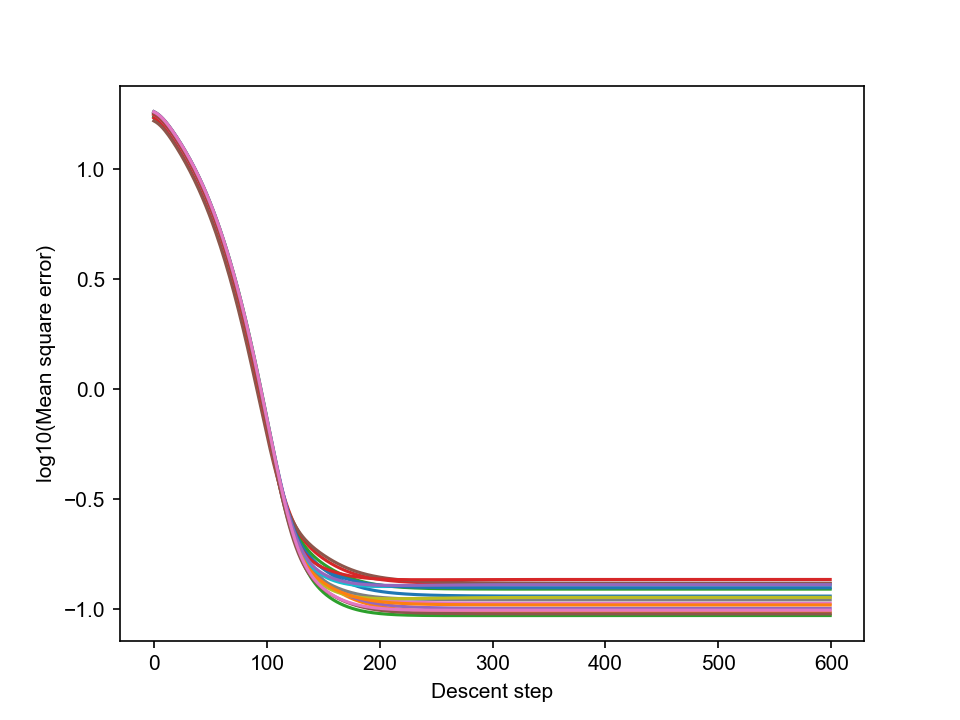

In [4]:
# Plot losses
iq.plot_losses(log=True)

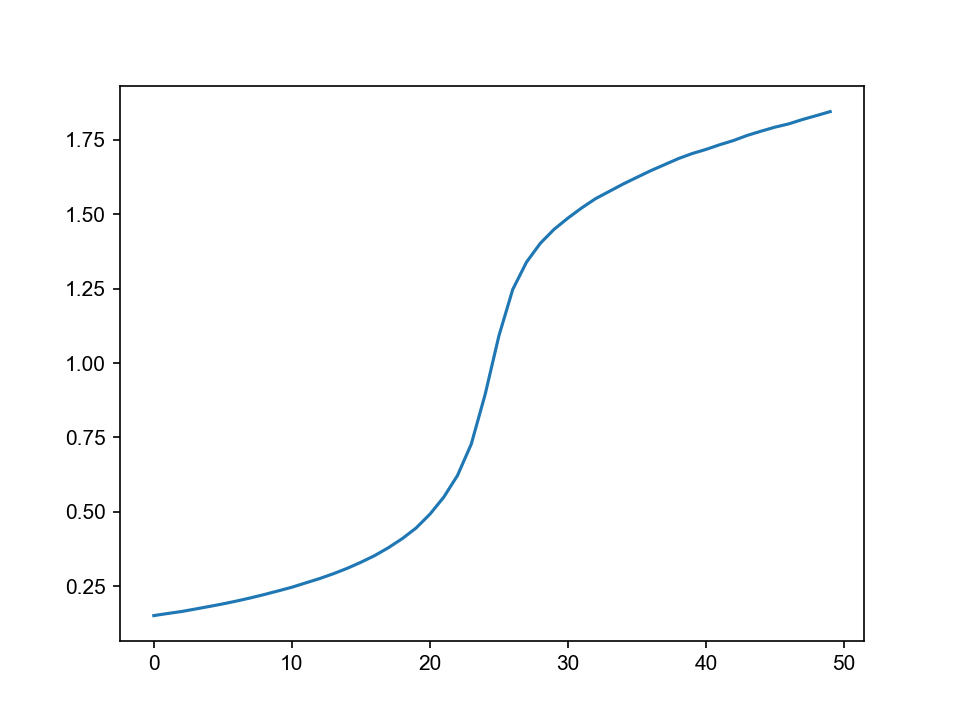

In [5]:
# Plot calibrated cytoplasmic profile
fig, ax = plt.subplots()
ax.plot(iq.cytbg)

In [6]:
# Save
np.savetxt("../../data/calibration_cyt.txt", iq.cytbg)